In [1]:
import pandas as pd
from keras.applications.resnet50 import ResNet50
from keras.applications.vgg19 import VGG19
from keras.models import Model
from keras.preprocessing import image
from tensorflow.keras.layers import Input, Lambda ,Dense ,Flatten ,Dropout
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import os
import cv2
from keras.applications.vgg16 import VGG16

In [2]:
train_dir = "D:CDAC_Project/Indian-Sign-Language-master/Indian-Sign-Language-master/data/images/train/"
eval_dir = "D:CDAC_Project/Indian-Sign-Language-master/Indian-Sign-Language-master/data/images/test/"

In [3]:
eval_dir

'D:CDAC_Project/Indian-Sign-Language-master/Indian-Sign-Language-master/data/images/test/'

In [4]:
import keras
def load_images(directory):
    images = []
    labels = []
    for idx, label in enumerate(uniq_labels):
        for file in os.listdir(directory + "/" + label):
            filepath = directory + "/" + label + "/" + file
            image = cv2.resize(cv2.imread(filepath), (64, 64))
            images.append(image)
            labels.append(idx)
    images = np.array(images)
    labels = np.array(labels)
    return(images, labels)

uniq_labels = sorted(os.listdir(train_dir))
images, labels = load_images(directory = train_dir)


if uniq_labels == sorted(os.listdir(eval_dir)):
    X_eval, y_eval = load_images(directory = eval_dir)
    

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size = 0.2, stratify = labels, random_state=7)

n = len(uniq_labels)
train_n = len(X_train)
test_n = len(X_test)

print("Total number of symbols: ", n)
print("Number of training images: " , train_n)
print("Number of testing images: ", test_n)

eval_n = len(X_eval)
print("Number of evaluation images: ", eval_n)

Total number of symbols:  18
Number of training images:  566
Number of testing images:  142
Number of evaluation images:  450


In [6]:
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)
y_eval = keras.utils.to_categorical(y_eval)

In [7]:
print(y_train[0])
print(len(y_train[0]))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
18


In [8]:
X_train = X_train.astype('float32')/255.0
X_test = X_test.astype('float32')/255.0
X_eval = X_eval.astype('float32')/255.0

In [9]:
y_train

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [10]:
classifier_vgg16 = VGG16(input_shape= (64,64,3),include_top=False,weights='imagenet')

In [11]:
for layer in classifier_vgg16.layers:
    layer.trainable = False

In [29]:
classifier1 = classifier_vgg16.output#head mode
classifier1 = Flatten()(classifier1)#adding layer of flatten
classifier1 = Dense(256, activation='relu')(classifier1)
classifier1 = Dropout(0.6)(classifier1)
classifier1 = Dense(18, activation='sigmoid')(classifier1)

model = Model(inputs = classifier_vgg16.input , outputs = classifier1)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [30]:
model.summary()

Model: "functional_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 64, 64, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 64, 64, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 32, 32, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 32, 32, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 32, 32, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 16, 16, 128)     

In [32]:
#fit the model
#it will take some time to train
#vgg16
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
18/18 [==============================] - 6s 332ms/step - loss: 2.1996 - accuracy: 0.3269 - val_loss: 1.7815 - val_accuracy: 0.7113
Epoch 2/10
18/18 [==============================] - 6s 346ms/step - loss: 1.7736 - accuracy: 0.4859 - val_loss: 1.2199 - val_accuracy: 0.7254
Epoch 3/10
18/18 [==============================] - 7s 367ms/step - loss: 1.4017 - accuracy: 0.5919 - val_loss: 0.8228 - val_accuracy: 0.8732
Epoch 4/10
18/18 [==============================] - 7s 366ms/step - loss: 1.0248 - accuracy: 0.6855 - val_loss: 0.5750 - val_accuracy: 0.9014
Epoch 5/10
18/18 [==============================] - 8s 462ms/step - loss: 0.8415 - accuracy: 0.7385 - val_loss: 0.4314 - val_accuracy: 0.9648
Epoch 6/10
18/18 [==============================] - 7s 414ms/step - loss: 0.6259 - accuracy: 0.8251 - val_loss: 0.3296 - val_accuracy: 0.9718
Epoch 7/10
18/18 [==============================] - 7s 412ms/step - loss: 0.5472 - accuracy: 0.8375 - val_loss: 0.2321 - val_accuracy: 0.9648
Epoch 

In [33]:
# Saving the model of vgg16
model.save('model_vgg16.h5')

In [34]:
score = model.evaluate(x = X_test, y = y_test, verbose = 0)
print('Accuracy for test images:', round(score[1]*100, 3), '%')
score = model.evaluate(x = X_eval, y = y_eval, verbose = 0)
print('Accuracy for evaluation images:', round(score[1]*100, 3), '%')

Accuracy for test images: 98.592 %
Accuracy for evaluation images: 45.778 %


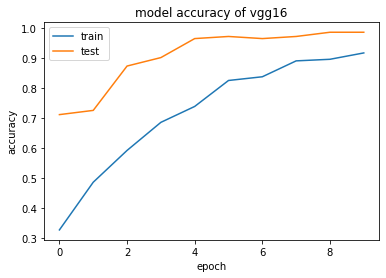

In [35]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy of vgg16')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

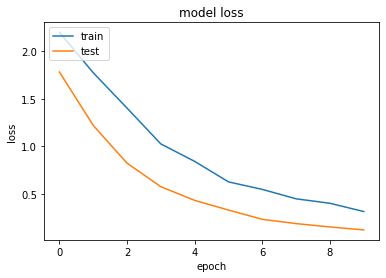

In [36]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

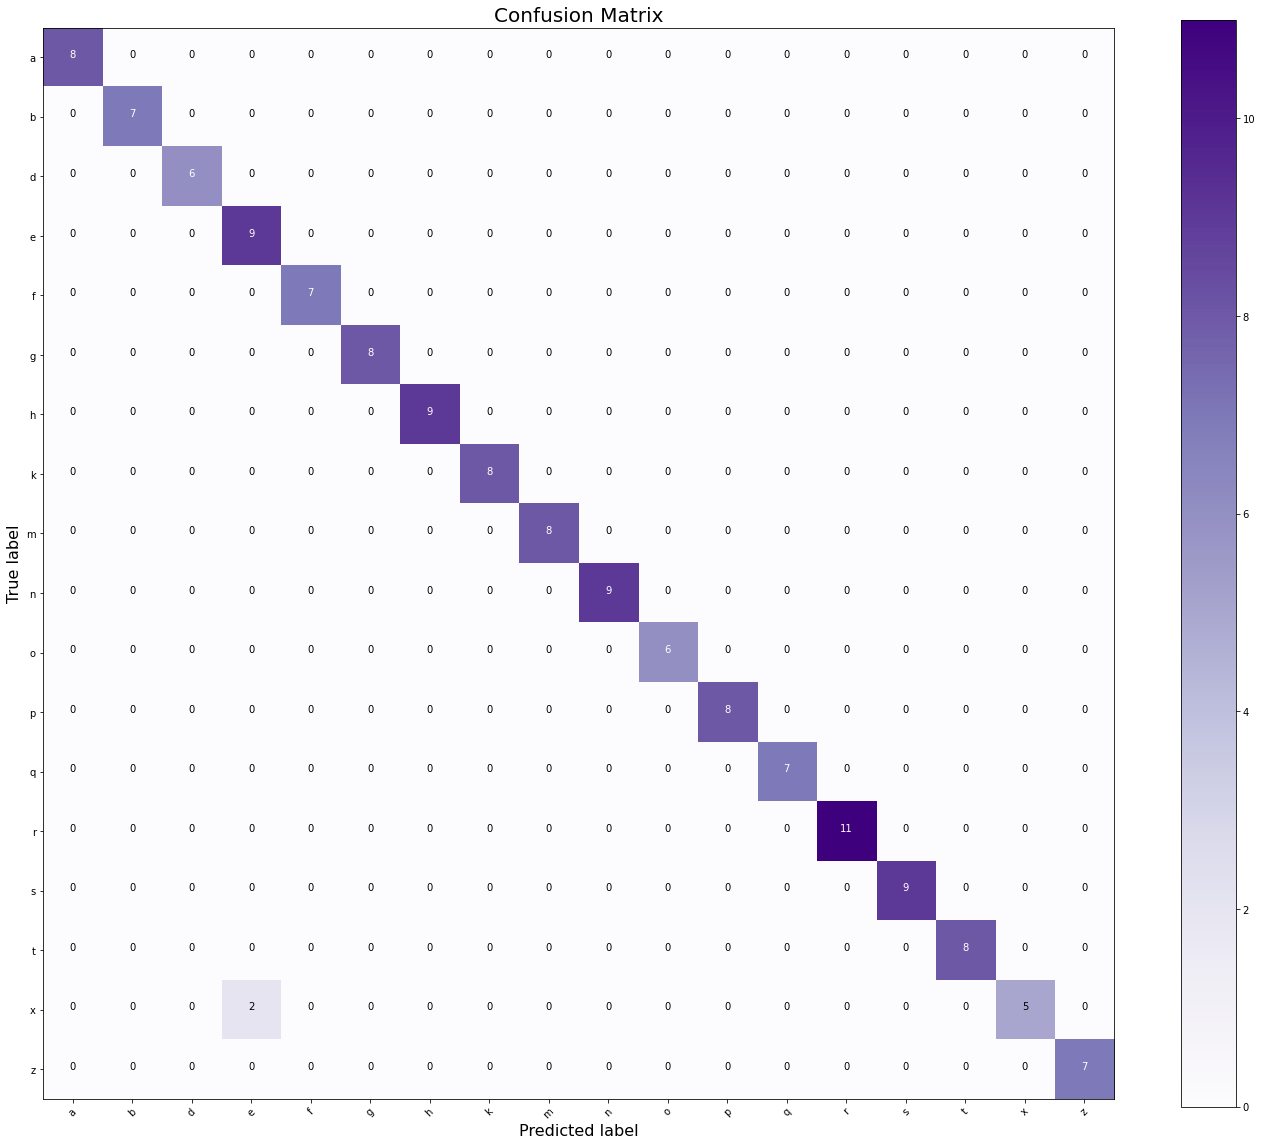

In [37]:
from sklearn.metrics import confusion_matrix
import itertools
def plot_confusion_matrix(y, y_pred):
    y = np.argmax(y, axis = 1)
    y_pred = np.argmax(y_pred, axis = 1)
    cm = confusion_matrix(y, y_pred)
    plt.figure(figsize = (24, 20))
    ax = plt.subplot()
    plt.imshow(cm, interpolation = 'nearest', cmap = plt.cm.Purples)
    plt.colorbar()
    plt.title("Confusion Matrix")
    tick_marks = np.arange(len(uniq_labels))
    plt.xticks(tick_marks, uniq_labels, rotation=45)
    plt.yticks(tick_marks, uniq_labels)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    ax.title.set_fontsize(20)
    ax.xaxis.label.set_fontsize(16)
    ax.yaxis.label.set_fontsize(16)
    limit = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment = "center",color = "white" if cm[i, j] > limit else "black")
    plt.show()
y_test_pred = model.predict(X_test, batch_size = 64, verbose = 0)
plot_confusion_matrix(y_test, y_test_pred)